In [60]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import pandas as pd
from tqdm import tqdm
import numpy as np

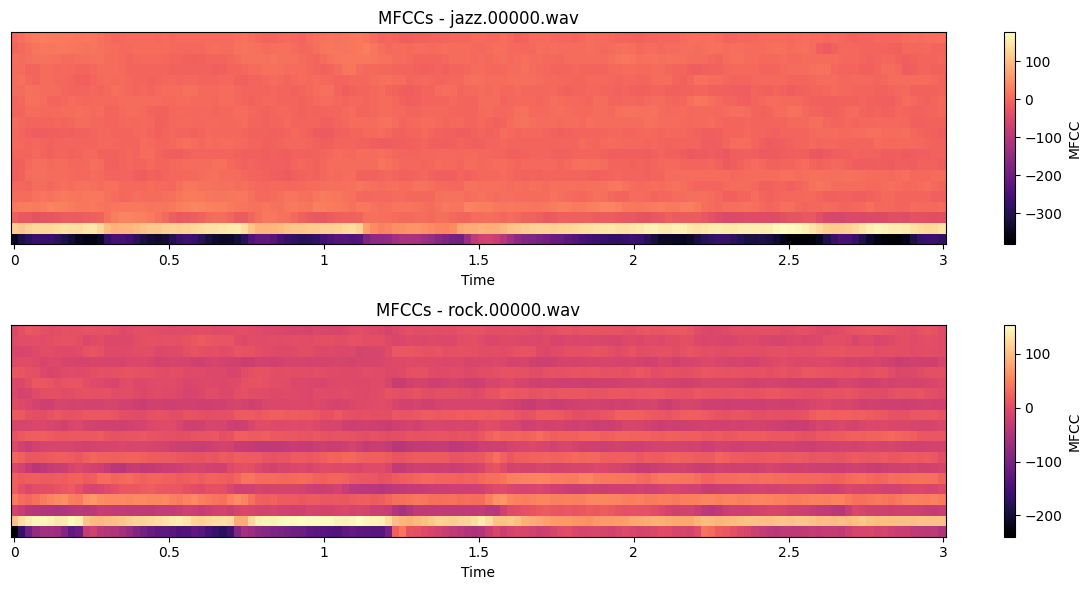

In [61]:
audio_files = ['data/genres_original/jazz/jazz.00000.wav', 
               'data/genres_original/rock/rock.00000.wav']

plt.figure(figsize=(12, 6))

for i, audio_file in enumerate(audio_files, 1):
    y, sr = librosa.load(audio_file, sr=None, duration=3)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    
    plt.subplot(2, 1, i)
    librosa.display.specshow(mfcc, x_axis='time', sr=sr, cmap="magma")
    plt.colorbar(label='MFCC')
    plt.title(f'MFCCs - {audio_file.split("/")[-1]}')

plt.tight_layout()
plt.show()


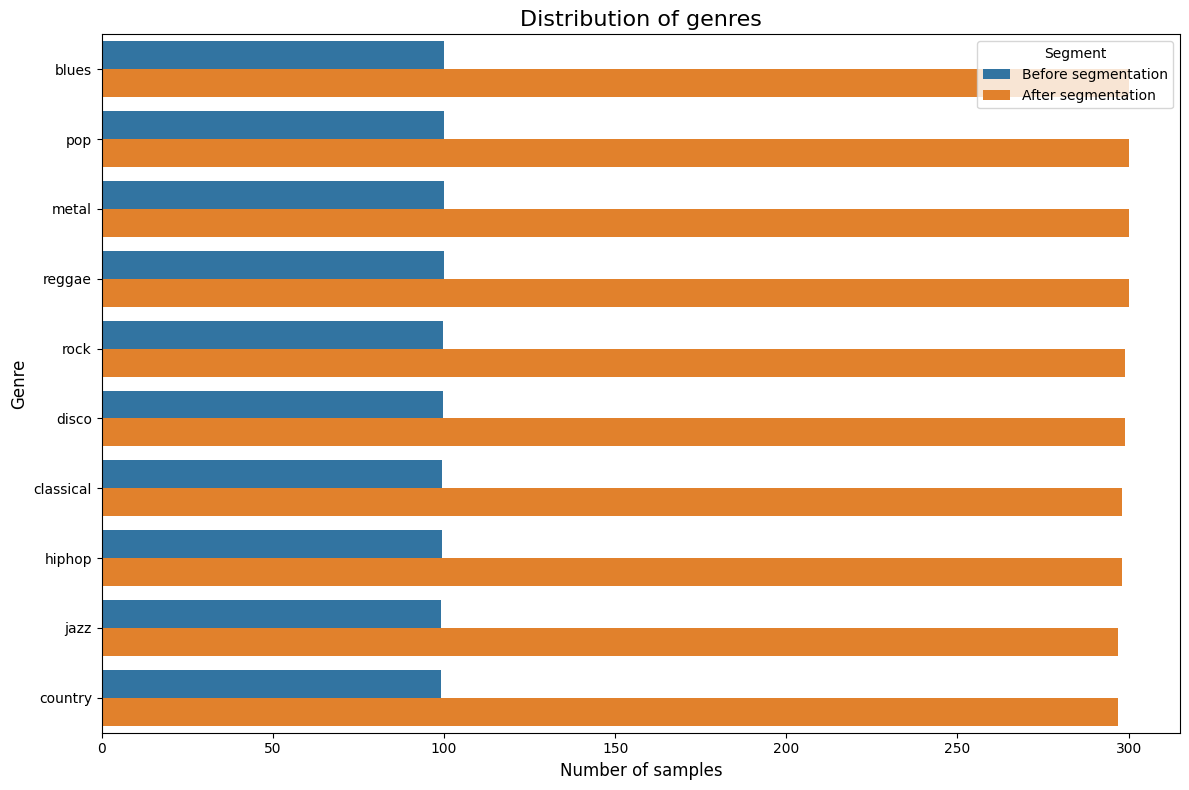

In [73]:
data = pd.read_csv("features_gtzan.csv")

genre_counts = data['genre'].value_counts().reset_index()
genre_counts.columns = ['Genre', 'Count']

genre_counts_before_segmented = genre_counts.copy()
genre_counts_before_segmented['Count'] = genre_counts_before_segmented['Count'] / 3  # Dividir por 3 para mostrar antes de segmentar

genre_counts_before_segmented['Segment'] = 'Before segmentation'
genre_counts['Segment'] = 'After segmentation'

combined_counts = pd.concat([genre_counts_before_segmented, genre_counts])

plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Genre', hue='Segment', data=combined_counts)

plt.title('Distribution of genres', fontsize=16)
plt.xlabel('Number of samples', fontsize=12)
plt.ylabel('Genre', fontsize=12)

plt.tight_layout()
plt.show()

